In this project I will be using a . csv file from my ebay store to visualize and findout my gross and net sales per month in 2022.
As well as figuring out the difference between the two to calculate costs such as shipping and fees per month. I will also be looking for the average sale price per item, as well as visualizing where orders are coming from in the US. 

Read in data from a local csv,
excel file, json, or any other
file type. There are many
ways to do this, but using
Pandas read_ functions is
pretty easy.

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import calendar

pd.options.display.max_rows = 374
pd.options.display.max_columns = 374

df = pd.read_csv(r'Transaction-Report-Feb-03-2023-07_27_28-0700-1382246697.csv')
columns = df.loc[:, ['Transaction date' , 'Order number' , 'Buyer username' , 'Ship to province/region/state', 'Ship to zip', 'Ship to country' ,\
     'Net amount' , 'Item ID' , 'Transaction ID' , 'Item title' , 'Gross transaction amount'] ]

df.head(2)


,Transaction date,Type,Order number,Legacy order ID,Buyer username,Buyer name,Ship to city,Ship to province/region/state,Ship to zip,Ship to country,Net amount,Payout currency,Payout date,Payout ID,Payout method,Payout status,Reason for hold,Item ID,Transaction ID,Item title,Custom label,Quantity,Item subtotal,Shipping and handling,Seller collected tax,eBay collected tax,Final Value Fee - fixed,Final Value Fee - variable,"Very high ""item not as described"" fee",Below standard performance fee,International fee,Deposit processing fee,Gross transaction amount,Transaction currency,Exchange rate,Reference ID,Description
0,"Jan 1, 2023",Other fee,16-09530-33898,394317145657-1262258968026,tremor37,Tim Pratt,--,--,--,--,-1.66,USD,"Jan 4, 2023",5725864515,Central National Bank of Enid *3735,Funds sent,--,394317145657,--,--,--,--,--,--,--,--,--,--,--,--,--,--,-1.66,USD,--,FEE-5162059151715,Ad Fee Standard
1,"Jan 1, 2023",Order,16-09530-33898,394317145657-1262258968026,tremor37,Tim Pratt,Belle Chasse,LA,70037-0667,US,19.00,USD,"Jan 4, 2023",5725864515,Central National Bank of Enid *3735,Funds sent,--,394317145657,1262258968026,The Bionic Woman: The Complete Series DVD with...,--,1,10,12.75,--,0.9,-0.3,-3.45,--,--,--,--,22.75,USD,--,--,--


1. Use built-in pandas or numpy
functions to do things like
remove 0’s and null values
where they don’t belong in
your dataset. - Here I figured out the blanks in my dataframe are from the transaction ID column. The blank was a string instead of a nan so I used a bool expression to filter those rows out of the dataframe. I also flipped the dataframe to start at January 2022 instead of December 2022. I also used pandas functions to check the data type of data tables and change the date column into a datetime as well as split it into 3 new columns so it would be easier to work with. 

2. Use custom functions or
lambdas to perform specific
operations to clean or manipulate your data, return
those values, then use them
in other parts of your project. - I did this below so using the group by function to aggregate Net and Gross sales columns and add them togther grouped by month. 

In [19]:
columns_without_blanks = columns[columns['Transaction ID'] != "--"]
cols_by_date = columns_without_blanks.loc[:: -1]
cols_by_date.head(2)






,Transaction date,Order number,Buyer username,Ship to province/region/state,Ship to zip,Ship to country,Net amount,Item ID,Transaction ID,Item title,Gross transaction amount
373,"Jan 1, 2022",16-08077-65484,ruma_2034,CA,95123-4603,US,13.55,393725788988,1172866574026,The Orange Box: Half-Life 2 & Portal (Xbox 360...,16.0
371,"Jan 3, 2022",03-08088-91555,jamesth_1138,OR,97801-2990,US,13.87,393804431741,1173260955026,Sony PlayStation 2 Electronic Arts Need For Sp...,16.2


In [20]:
cols_by_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 373 to 1
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction date               105 non-null    object 
 1   Order number                   105 non-null    object 
 2   Buyer username                 105 non-null    object 
 3   Ship to province/region/state  105 non-null    object 
 4   Ship to zip                    105 non-null    object 
 5   Ship to country                105 non-null    object 
 6   Net amount                     105 non-null    float64
 7   Item ID                        105 non-null    object 
 8   Transaction ID                 105 non-null    object 
 9   Item title                     105 non-null    object 
 10  Gross transaction amount       105 non-null    float64
dtypes: float64(2), object(9)
memory usage: 9.8+ KB


In [21]:
cols_by_date['Transaction date'] = pd.to_datetime(cols_by_date['Transaction date'])
cols_by_date["Year"] = cols_by_date["Transaction date"].dt.year
cols_by_date["Month"] = cols_by_date["Transaction date"].dt.month_name().str.slice(stop=3)
cols_by_date["Day"] = cols_by_date["Transaction date"].dt.day

Below once I have aggregated my gross and net sales when the dataframe sums them and outputs it was displaying the months in alphabetical order. I will create a list in order to sort by months so that these go in order for when I visualize the data. 

In [22]:
dates_in_order = pd.date_range(start='2022-01-01', end='2023-01-01', freq='MS')
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


Do 5 basic calculations with
Pandas, like finding the
sum(), median(), mean(), or
mode() of a column. You
could divide two columns by
each other. You could
multiple a column by a
random integer. You could
use string operations and find
the most common letter in a
given entry.

Here I am using the groupby function in pandas to group the months of the year to get the sum of the gross transactions per month.
I am aggregating gross and net sales. When I finished this process the months displayed alphabetically instead of in order so above I made a list and categorized the months so it would display properly. After sorting that issue I visualized the data into a group bar graph. 

In [29]:
sales_by_month = cols_by_date.groupby("Month").agg(
  gross_sales=('Gross transaction amount', np.sum,),
    net_sales=('Net amount', np.sum,), gross_avg=('Gross transaction amount', np.mean), net_avg=('Net amount', np.mean))

sales_by_month['Costs'] = sales_by_month.apply(lambda row: row.gross_sales - row.net_sales, axis = 1)
sales_by_month.head(3)





,gross_sales,net_sales,gross_avg,net_avg,Costs
Month,,,,,
Apr,332.24,282.76,33.224000,28.276000,49.48
Aug,220.33,188.39,36.721667,31.398333,31.94
Dec,610.97,523.20,55.542727,47.563636,87.77


<Axes: xlabel='Month'>

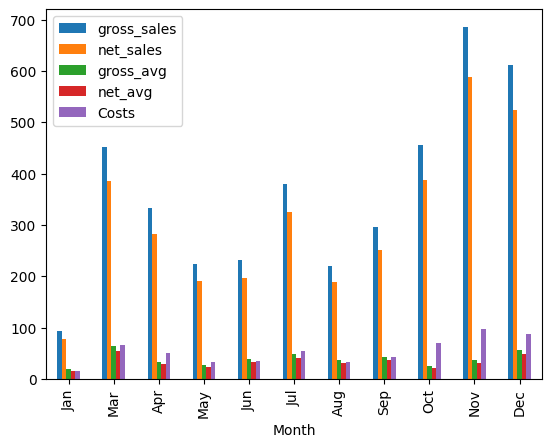

In [30]:
sales_by_month_order = sales_by_month.sort_values('Month', key = lambda x : pd.Categorical(x, categories=months, ordered=True))
sales_by_month_order.plot.bar(stacked=False)
